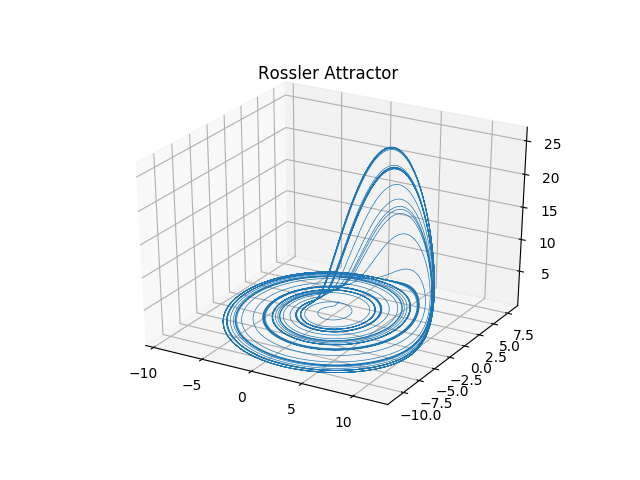

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def rossler(xyz, *, a=0.2, b=0.2, c=5.7):
    _, x, y, z = xyz
    x_dot = -y-z
    y_dot = x + a*y
    z_dot = b + z*(x-c)
    return np.array([1, x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 30000

xyzs = np.empty((num_steps + 1, 4))  # Need one more for the initial values
xyzs[0] = (0, 0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + rossler(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

xyz_coords = np.empty((num_steps+1, 3))
for i in range(num_steps+1):
    xyz_coords[i] = xyzs[i][1:]

#print(xyz_coords)
    
ax.plot(*xyz_coords[0:30000].T, lw=0.5)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Rossler Attractor")

plt.show()

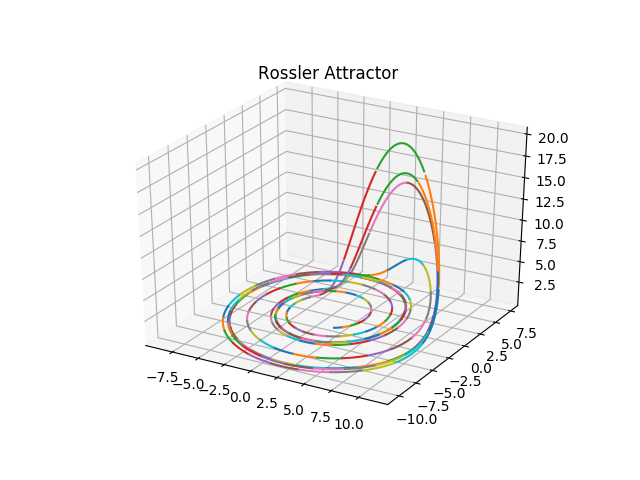

[6.4, 4.8]

In [5]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

xyzs = xyzs[25000:30000]
xyz_coords = xyz_coords[500:10000]
num_steps = len(xyzs)
#num_steps=num_steps-5000

traj_list = []
#num_steps=250
length = 25
i = 0
while i+length<num_steps:
    traj_list.append(xyzs[i:i+length])
    i = i+int(1*length)

ax = plt.figure().add_subplot(projection='3d')

for i in range(0,200):
    ax.plot(*xyz_coords[i*length:(i+1)*length].T)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Rossler Attractor")

plt.show()
plt.rcParams['figure.figsize']

In [4]:
t2s = Traj2Sim()

load=False

if load == False:
    t2s.set_trajectories(traj_list)
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='rossler.npy')
if load == True:
    t2s.load_bifilt(filename='rossler.npy')

|████████████████▌                       | ▅▇▇ 8117/19701 [41%] in 6:13 (21.8/s, eta: 8:52)     96/19701 [0%] in 3s (31.2/s, eta: 10:24)    ▃▁▃ 223/19701 [1%] in 7s (31.3/s, eta: 10:22)   in 9s (31.3/s, eta: 10:22)     ▆█▆ 623/19701 [3%] in 21s (29.6/s, eta: 10:43)  in 24s (28.8/s, eta: 11:00)  ▅▃▁ 685/19701 [3%] in 24s (28.7/s, eta: 11:01)  707/19701 [4%] in 25s (28.4/s, eta: 11:08)   in 29s (27.5/s, eta: 11:27)   (26.3/s, eta: 11:51)  (26.3/s, eta: 11:52)   1070/19701 [5%] in 42s (25.7/s, eta: 12:05)  1125/19701 [6%] in 45s (25.3/s, eta: 12:15) ▃▁▃ 1173/19701 [6%] in 47s (25.1/s, eta: 12:19)   in 49s (24.8/s, eta: 12:24)  █▆▄ 1293/19701 [7%] in 52s (24.7/s, eta: 12:24)  ▄▆█ 1377/19701 [7%] in 56s (24.5/s, eta: 12:28)  in 59s (24.3/s, eta: 12:31)  1433/19701 [7%] in 59s (24.4/s, eta: 12:30)  1445/19701 [7%] in 59s (24.3/s, eta: 12:30)  in 1:03 (24.2/s, eta: 12:32) ▆▄▂ 1521/19701 [8%] in 1:03 (24.2/s, eta: 12:32)▄▆█ 1538/19701 [8%] in 1:04 (24.1/s, eta: 12:34)▃▅▇ 1610/19701 [8%] in 1:0

|███████████████████████████████████     | ▆█▆ 17223/19701 [87%] in 13:18 (21.6/s, eta: 1:5in 6:16 (21.8/s, eta: 8:48)8336/19701 [42%] in 6:22 (21.8/s, eta: 8:41) (21.8/s, eta: 8:40) (21.8/s, eta: 8:39)▃▁▃ 8381/19701 [43%] in 6:24 (21.8/s, eta: 8:39) 8399/19701 [43%] in 6:25 (21.8/s, eta: 8:38) (21.9/s, eta: 8:32) (21.9/s, eta: 8:24)(21.9/s, eta: 8:22)▂▄▆ 8744/19701 [44%] in 6:39 (21.9/s, eta: 8:20) 8822/19701 [45%] in 6:42 (22.0/s, eta: 8:15)▁▃▅ 8856/19701 [45%] in 6:43 (22.0/s, eta: 8:14)8866/19701 [45%] in 6:43 (22.0/s, eta: 8:13)in 6:46 (22.0/s, eta: 8:11)▃▅▇ 8941/19701 [45%] in 6:47 (22.0/s, eta: 8:09)(22.0/s, eta: 8:09) (22.0/s, eta: 8:08)in 6:52 (22.0/s, eta: 8:03)▂▄▆ 9222/19701 [47%] in 6:58 (22.1/s, eta: 7:55) (22.1/s, eta: 7:53) ▁▃▅ 9295/19701 [47%] in 7:01 (22.1/s, eta: 7:51)(22.1/s, eta: 7:49)(22.1/s, eta: 7:46) 9461/19701 [48%] in 7:08 (22.1/s, eta: 7:43) ▃▁▃ 9533/19701 [48%] in 7:11 (22.1/s, eta: 7:40) (22.1/s, eta: 7:37) 9617/19701 [49%] in 7:14 (22.2/s, eta: 7:35) 9654/

|████████████████████████████████████████| 19701/19701 [100%] in 15:20.9 (21.39/s)         17234/19701 [87%] in 13:19 (21.6/s, eta: 1:5▁▃▅ 17329/19701 [88%] in 13:23 (21.6/s, eta: 1:5 17340/19701 [88%] in 13:24 (21.6/s, eta: 1:5(21.6/s, eta: 1:4 ▄▂▂ 17465/19701 [89%] in 13:29 (21.6/s, eta: 1:4(21.6/s, eta: 1:417506/19701 [89%] in 13:31 (21.6/s, eta: 1:4 (21.6/s, eta: 1:4 (21.6/s, eta: 1:4 (21.6/s, eta: 1:317658/19701 [90%] in 13:38 (21.6/s, eta: 1:317700/19701 [90%] in 13:40 (21.6/s, eta: 1:3in 13:42 (21.6/s, eta: 1:3 ▃▁▃ 17799/19701 [90%] in 13:44 (21.6/s, eta: 1:2 17833/19701 [91%] in 13:45 (21.6/s, eta: 1:2▃▅▇ 17886/19701 [91%] in 13:48 (21.6/s, eta: 1:2 in 13:50 (21.6/s, eta: 1:2 (21.6/s, eta: 1:2 18008/19701 [91%] in 13:53 (21.6/s, eta: 1:118108/19701 [92%] in 13:58 (21.6/s, eta: 1:1 in 14:09 (21.6/s, eta: 1:0 in 14:09 (21.6/s, eta: 1:0in 14:12 (21.6/s, eta: 1:018432/19701 [94%] in 14:13 (21.6/s, eta: 59s▁▃▅ 18458/19701 [94%] in 14:14 (21.6/s, eta: 58s18468/19701 [94%] in 14:15 (2

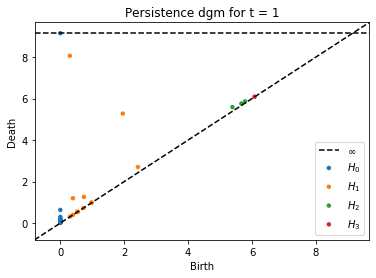

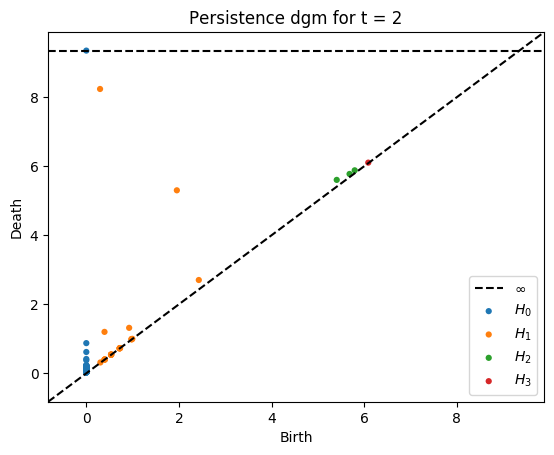

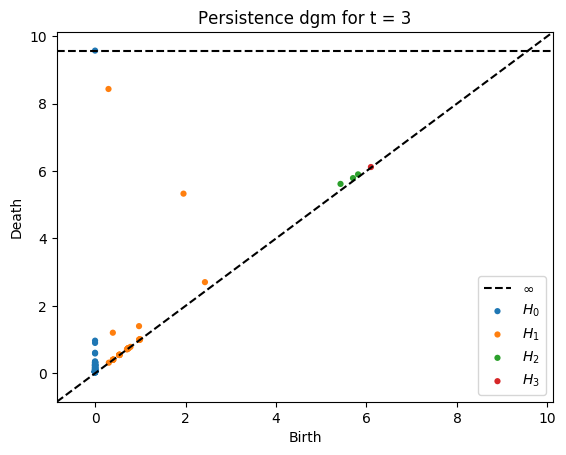

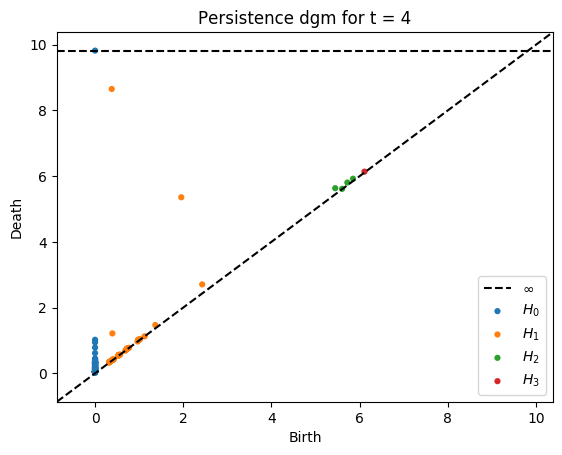

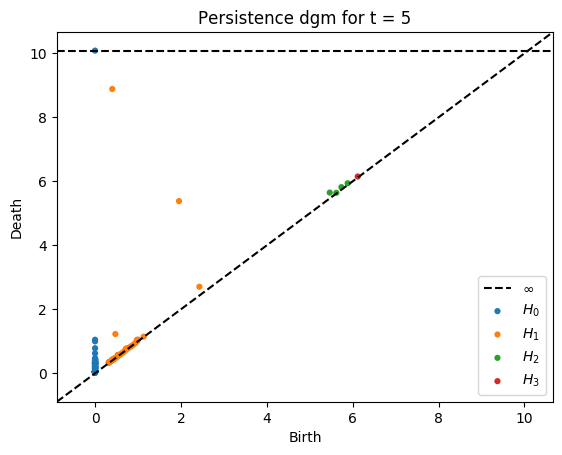

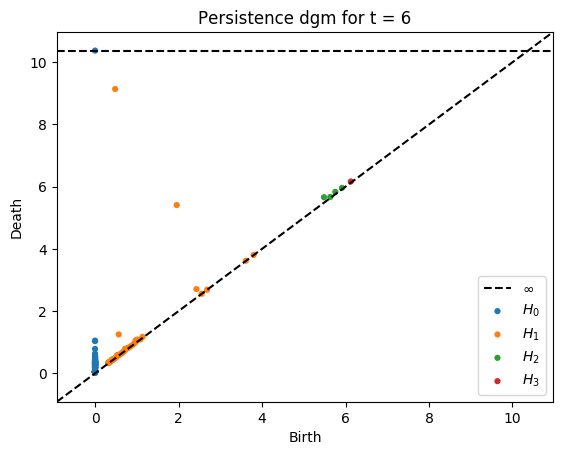

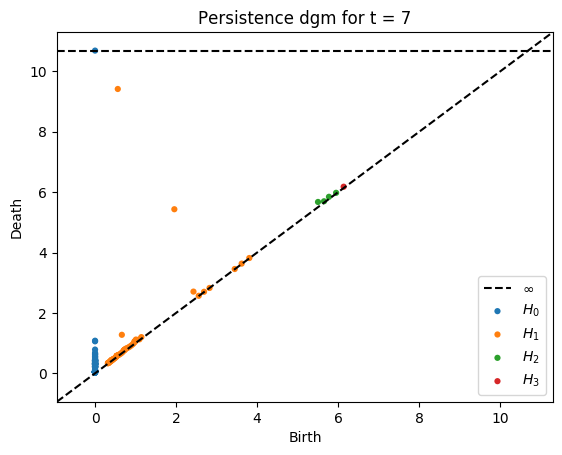

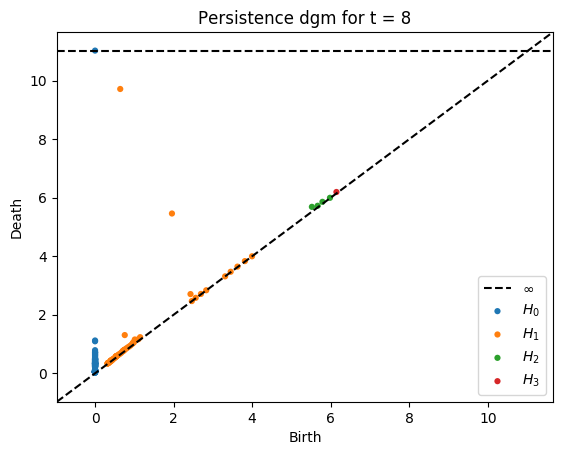

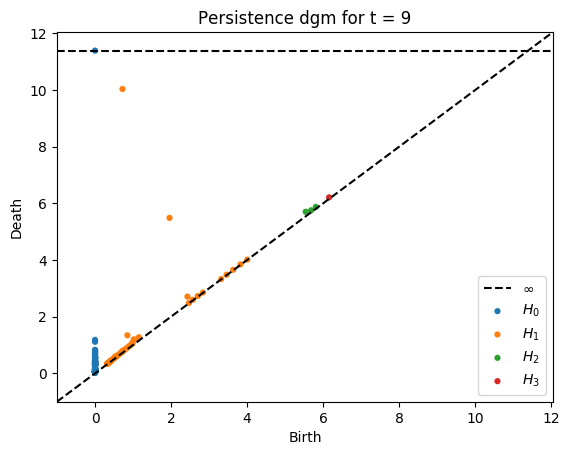

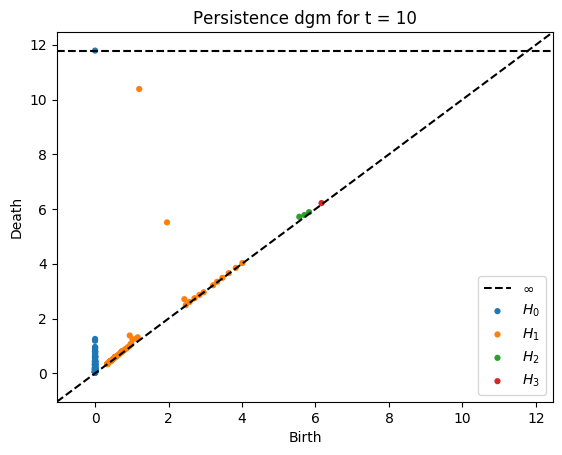

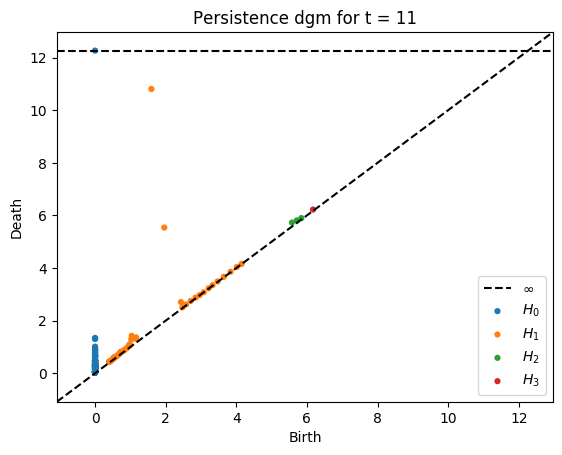

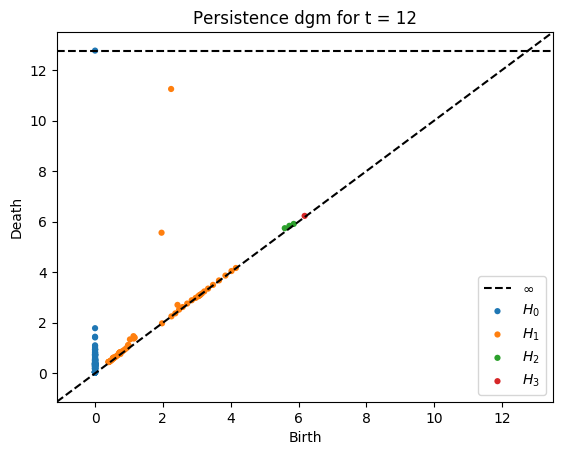

In [ ]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=3)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)